# POSTTEST 3 Visualisasi Data
## Nama: Gilang Raditya
## NIM: 2009106072

<a href='https://gist.github.com/PickleSnek/14dd6c9e57d557b267566ec1a606dc55' target='_blank'> Link Dataset Video Games Sales And Critics </a>

### Import Module

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Baca file csv lalu tampilkan info dataset

In [32]:
dataset = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Visualisasi Menggunakan Bar Chart
Sebelum Dilakukan Visualisasi dilakukan pembersihan terhadap nilai Critic_Score yang N/A.
Selanjutnya, kita filter lagi Publisher yang merilis game lebih dari 2 game.
Kemudian kita ambil rata-rata Critic_Score dengan mempertimbangkan Critic_Count dari game yang sudah dirilis oleh publisher.
Setelah itu kita urutkan secara descending dan kita ambil 10 nilai pertama

In [34]:
temp = dataset["Publisher"].value_counts()
filtered_ds = dataset[dataset["Publisher"].map(temp) > 2]

final = filtered_ds.dropna(
    subset=["Critic_Score"]
).drop(
    dataset[dataset["Critic_Count"] < 10].index, errors='ignore'
).groupby('Publisher').apply(
    lambda x: np.average(x['Critic_Score'], weights=x['Critic_Count'])
).reset_index(
    name="Critic_Score"
).sort_values(
    by=['Critic_Score'], ascending=False
).head(10)

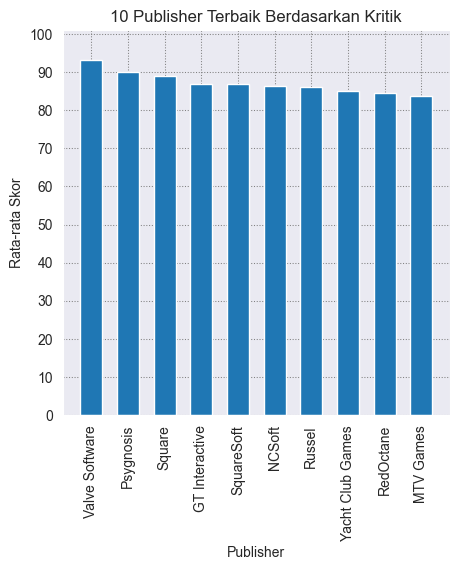

In [35]:
# untuk mengatur ukuran dan dpi dari chart
plt.figure(figsize=(5, 5), dpi=100)
# membuat bar dengan axis x = publisher dan y = skor kritik
plt.bar(final["Publisher"], final["Critic_Score"], width=0.6)
# membuat grid dan menaruhnya di background
plt.gca().set_axisbelow(True)
plt.grid(True, color="grey", linestyle=':', linewidth=0.75, zorder=2.6)
# judul chart
plt.title("10 Publisher Terbaik Berdasarkan Kritik")
# judul nama label chart
plt.xlabel("Publisher")
plt.ylabel("Rata-rata Skor")
# mengatur ticks x agar berputar ke 90 derajat
plt.xticks(rotation=90)
# mengatur ticks y isinya dari 0 sampai 100 dengan langkah 10
plt.yticks(ticks=range(0, 101, 10))
# mengatur tampilan plot agar y fokus ke nilai 0 sampai 101
plt.ylim(0, 101)
# menampilkan chart
plt.show()

Berikut adalah Bar chart dari 10 Publisher terbaik berdasarkan rata-rata skor kritik.
Kesimpulan yang bisa didapatkan dari visualisasi:
<ul>
    <li>Publisher Valve Software menempati peringkat pertama, hal ini disebabkan karna banyak game yang dipublish valve merupakan game yang sangat <i>genre-defining</i> seperti half-life yang merupakan nenek moyang dari genre fps yang kita ketahui. Dan juga Valve tidak lagi membuat games yang membuat rata-rata skor-nya no satu karna tidak terkontaminasi oleh praktek video games modern yang sangat predatory seperti lootboxes, p2w, dll.</li>
    <li>Ketiga publisher teratas yaitu Valve, Psygnosis, dan Square memiliki rata-rata yang lebih tinggi daripada yang lainnya. Hal ini terjadi karna ketiga publisher ini sudah tidak mengeluarkan game lagi. Juga, karna adanya perasaan nostalgia maka dari itu biasanya sebuah kritik akan melakukan retro review yang memberikan skor tinggi pada game tersebut. Psygnosis ditutup pada tahun 2012 sedangkan Square berubah nama menjadi SquareEnix.</li>
</ul>

# Visualisasi Menggunakan Pie Chart

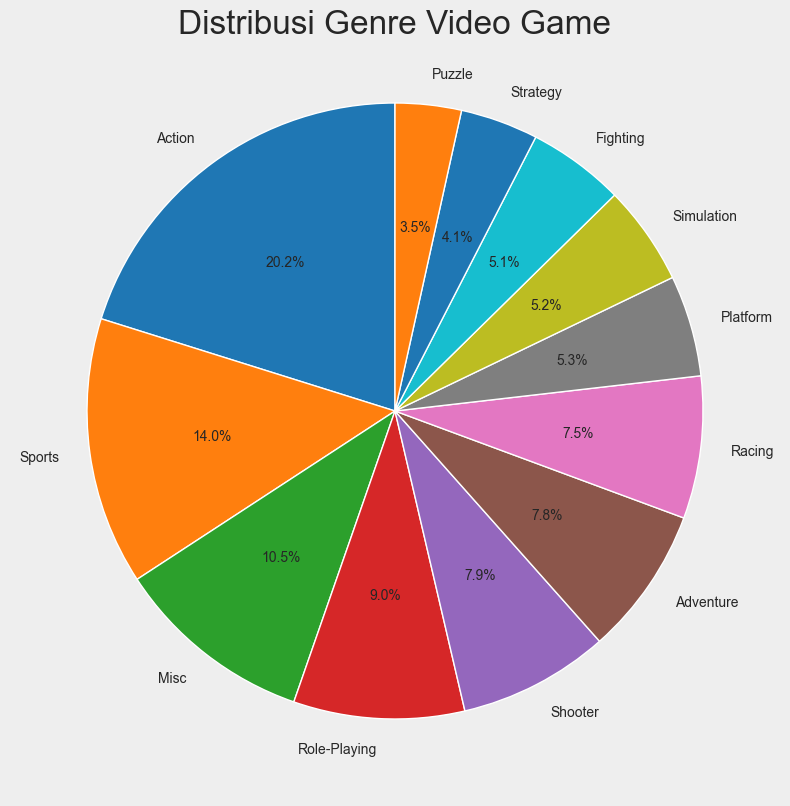

In [36]:
# Menghapus baris yang column genrenya N/A
dataset_genre = dataset.dropna(subset=['Genre'])

# Menghitung Jumlah Genre
data_pie = dataset_genre['Genre'].value_counts().rename_axis('Genre').reset_index(name='count')

# untuk mengatur ukuran, warna background, dan dpi dari visualisasi
plt.figure(figsize=(10, 10), facecolor='#EEEEEE', dpi=100)
# menggambar pie chart
plt.pie(data_pie['count'], labels=data_pie['Genre'], startangle=90, autopct='%.1f%%')
# judul chart
plt.title('Distribusi Genre Video Game', fontsize=24, y=0.98)
plt.show()

Berikut adalah pie chart dari distribusi genre dari video game.
Hal yang dapat kita simpulkan adalah:
<ul>
    <li>3 Genre terbesar yaitu Action, Sports dan Misc, Ketiga genre ini misalnya digabung mengambil lebih dari 40% dari game keseluruhan. Alasan mengapa Action menjadi genre terbesar karna Definisi genre action terlalu luas. Secara Definisi, Action game adalah games yang melakukan aksi/tindakan, Tetapi hampir semua game melakukan suatu tindakan. Maka dari itu genre action biasanya dijadikan wadah untuk game yang tidak sesuai dengan genre lainnya.</li>
    <li>3 Genre terkecil yaitu Puzzle, Strategy, dan Fighting. Ketiga genre ini misalnya digabung mengambil kurang dari 15% dari game keseluruhan. Alasan mengapa Puzzle menjadi genre yang paling sedikit karna pada umumnya Puzzle jarang menjadi gameplay loop utama, biasanya puzzle dijadikan pendamping dari Genre lain seperti action, adventure, platforming, dll.</li>
</ul>

# Visualisasi Menggunakan Line Plot

In [37]:
ds_fix_sales = dataset.copy()
# Column yang akan diubah nilainya
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i in sales_columns:
    # Kali 1 juta nilai yang ada di kolom
    ds_fix_sales[i] *= 1000000
ds_group_year = ds_fix_sales.groupby("Year_of_Release").sum(numeric_only=True)
ds_group_year.drop([2017.0,2020.0], inplace=True)

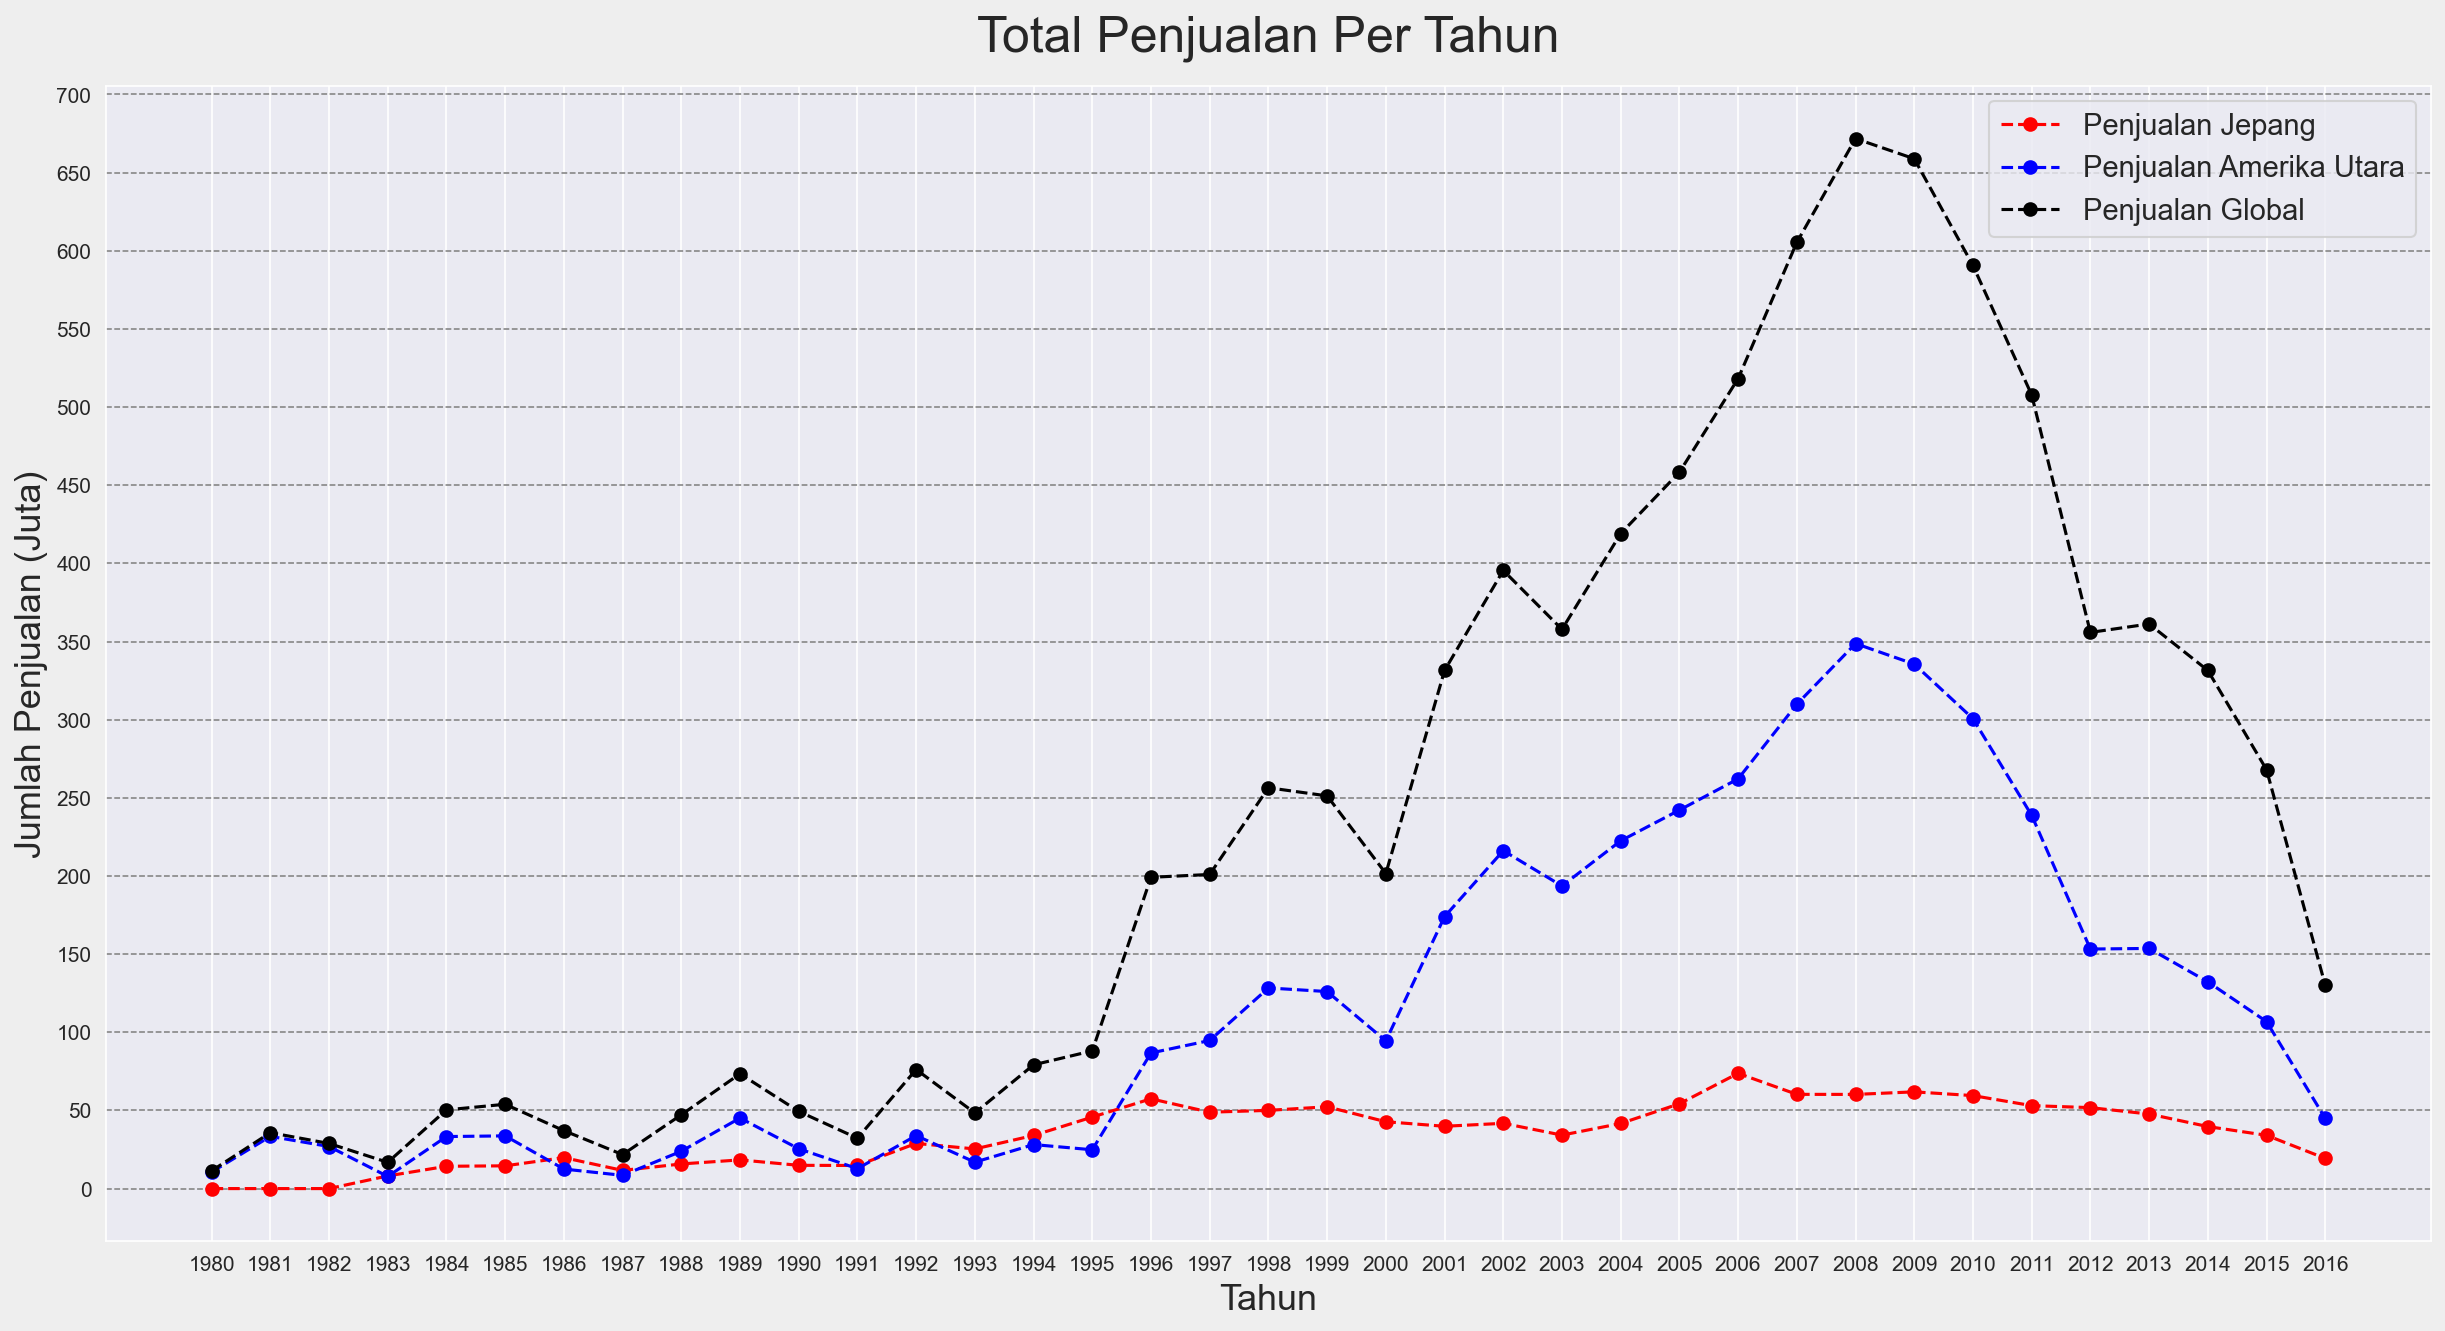

In [38]:
# untuk mengatur ukuran, warna background, dan dpi dari visualisasi
plt.figure(figsize=(20, 10),dpi=150,facecolor='#EEEEEE')
# line plot untuk JP_Sales (Jepang) yang berwarna merah
plt.plot(ds_group_year.index, ds_group_year.JP_Sales, linestyle='--', marker='o', color='red', label='Penjualan Jepang')
# line plot untuk NA_Sales (Amerika Utara) yang berwarna biru
plt.plot(ds_group_year.index, ds_group_year.NA_Sales, linestyle='--', marker='o', color='blue', label='Penjualan Amerika Utara')
# line plot untuk Global_Sales yang berwarna hitam
plt.plot(ds_group_year.index, ds_group_year.Global_Sales, linestyle='--', marker='o', color='black', label='Penjualan Global')
# membuat grid dan menaruhnya di background
plt.gca().set_axisbelow(True)
plt.grid(True, color="grey", linestyle='--', linewidth=0.75, axis='y')
# judul chart
plt.title("Total Penjualan Per Tahun", fontsize=24, y=1.02)
# judul nama label chart
plt.xlabel("Tahun", fontsize='xx-large')
plt.ylabel("Jumlah Penjualan (Juta)", fontsize='xx-large')
# mengatur ticks x index dari ds_group_year
plt.xticks(ticks=ds_group_year.index)
# mengatur ticks y isinya dari 0 sampai 700 juta dengan langkah 50 juta, dan label isinya dari 0 sampai 700 dengan langkah 50
plt.yticks(ticks=range(0, 700000001, 50000000), labels=range(0, 701, 50))
# menampilkan legenda dari line plot
plt.legend(fontsize=14)
# menampilkan visualisasi
plt.show()

Berikut adalah Jumlah Penjualan Video Game per tahun.
Di dalam plot terdapat Penjualan Global, Penjualan Jepang, dan Penjualan Amerika Utara.
Kesimpulan yang bisa didapatkan dari visualisasi adalah:
<ul>
    <li>Tahun Penjualan Tertinggi Bagi Global dan Amerika Utara adalah tahun 2008. Tahun 2008 merupakan yang sangat bagus dengan video game terkenal seperti GTA 4, Saints Row 2, GOW Chains Of Olympus, Dead Space, dll.</li>
    <li>Tahun Penjualan Tertinggi Bagi Jepang adalah tahun 2006. Hal ini disebabkan oleh video games jepang yang bagus seperti Legend of Zelda: Twilight Princess, Okami, Final Fantasy XII, dan New Super Mario Bros.</li>
    <li>Tahun Penjualan Terendah Bagi Global 1980. Alasan mengapa rendah karena kurangnya data di dunia maya tentang game pada tahun 1980 maupun sebelum 1980. Internet Komersil baru muncul pada awal 1990-an. Hal ini juga mengindikasikan bahwa pemain video game semakin meningkat.</li>
    <li>Tahun Penjualan Terendah Bagi Amerika Utara adalah tahun 1983. Hal ini disebabkan oleh "The video game crash of 1983". Crash ini menyebabkan matinya game konsol generasi kedua di Amerika Utara.
    Crash ini disebabkan oleh beberapa faktor antara lain market saturasi, banyaknya konsol dan game tersedia yang memiliki kualitas yang buruk, serta berkurangnya minat untuk membeli konsol game daripada PC. Game pelopor yang menyebabkan Crash ini adalah E.T. untuk Atari 2600, yang sampai sekarang banyak kritik yang menyebutnya "Video Game Terburuk Sepanjang Masa".
    Crash ini dipulihkan Nintendo dengan Perilisan game konsol NES yang diberi label "Entertainment System" agar menghindari konotasi negatif dari kata Game Konsol.</li>
    <li>Tahun Penjualan Terendah Bagi Jepang adalah tahun 1983. Data game sebelum tahun 1983 tidak ada di dalam database. Hal ini mengindikasikan bahwa pemain video game semakin meningkat di Jepang.</li>
    <li>Bila kita lihat total penjualan sebelum tahun 2000, bisa kita lihat titik penjualan bergerak naik turun. Hal ini disebabkan karna siklus perilisan game yang sangat berbeda dari jaman sekarang. Siklus perilisan game sekarang adalah per-tahun sedangkan jaman dahulu siklus perilisannya adalah per 4 atau 5 tahun.</li>

</ul>

# Visualisasi Menggunakan Density Plot

In [39]:
# Hapus row dengan Critic_Score kosong
ds_drop_critics = dataset.dropna(subset=["Critic_Score"])
# Hapus row dengan User Score 'tbd'
ds_drop_critics = ds_drop_critics[ds_drop_critics.User_Score != 'tbd']
ds_fix_critics = ds_drop_critics.copy()
# Ubah tipe data User_Score dari object ke float64
ds_fix_critics.User_Score = ds_fix_critics.User_Score.astype('float64')
# Kali 10 nilai User_Score
ds_fix_critics.User_Score *= 10

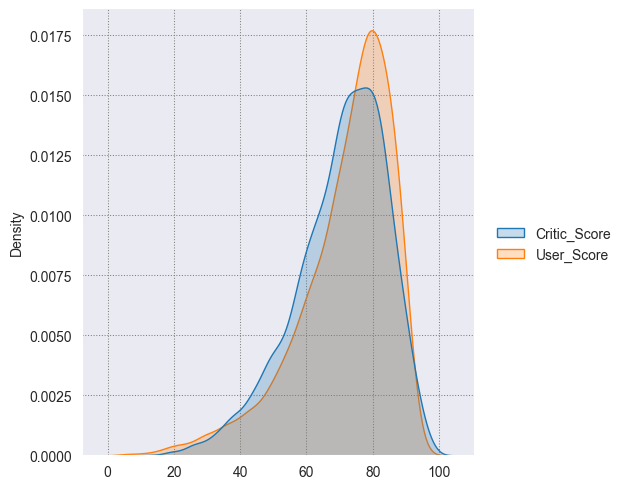

In [40]:
# Gambar density plot
sns.displot(ds_fix_critics[["Critic_Score", "User_Score"]], kind='kde', fill=True)
# membuat grid dan menaruhnya di background
plt.gca().set_axisbelow(True)
plt.grid(True, color="grey", linestyle=':', linewidth=0.75, zorder=2.6)
# menampilkan visualisasi
plt.show()

Berikut adalah Density plot antara Critic_Score dan User_Score.
Hal yang dapat disimpulkan adalah:
<ul>
    <li>Critic_Score dan User_Score nilainya sama-sama menceng ke kiri atau memiliki kemencengan negatif</li>
    <li>User_Score lebih memiliki outlier dibandingkan Critic_Score walaupun Critic_Score lebih menyebar dibandingkan User_Score</li>
</ul>